In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as graph
from tqdm import tqdm
import scipy.stats as stats
import seaborn as sns

vcf_file = 'test_file.csv'

In [2]:
df = pd.concat(pd.read_csv(vcf_file, header = 0, chunksize=50000))
df.head()

,scaffold,position,nothing,ref-allele,alternate-allele,quality,filter,info,chromosome
0,1.1,576,.,C,T,742.91,PASS,AC=6;AF=0.150;AN=40;DP=83;ExcessHet=0.0006;FS=...,1
1,1.1,578,.,G,A,1560.01,PASS,AC=10;AF=0.238;AN=42;DP=77;ExcessHet=0.0000;FS...,1
2,1.1,579,.,C,T,1352.25,PASS,AC=8;AF=0.190;AN=42;DP=79;ExcessHet=0.0001;FS=...,1
3,1.1,580,.,C,T,311.49,PASS,AC=3;AF=0.075;AN=40;BaseQRankSum=1.45;Clipping...,1
4,1.1,585,.,A,G,2613.34,PASS,AC=20;AF=1.00;AN=20;DP=73;ExcessHet=3.0103;FS=...,1


In [3]:
%%time
df['AC'] = df['info'].apply(lambda x: x.split (';')[0]).apply(lambda x: x.split ('=')[1]).apply(pd.to_numeric)
df['AF'] = df['info'].apply(lambda x: x.split (';AF=')[1]).apply(lambda x: x.split(';')[0]).apply(pd.to_numeric)
df['AN'] = df['info'].apply(lambda x: x.split (';AN=')[1]).apply(lambda x: x.split(';')[0]).apply(pd.to_numeric)
df['DP'] = df['info'].apply(lambda x: x.split (';DP=')[1]).apply(lambda x: x.split(';')[0]).apply(pd.to_numeric)
df['FS'] = df['info'].apply(lambda x: x.split (';FS=')[1]).apply(lambda x: x.split(';')[0]).apply(pd.to_numeric)
df['SOR'] = df['info'].apply(lambda x: x.split (';SOR=')[1]).apply(lambda x: x.split(';')[0]).apply(pd.to_numeric)

df.drop(columns=['info', 'nothing'], inplace=True)

max_an = df[df['AN'] == 80]

CPU times: user 2min 59s, sys: 1.07 s, total: 3min
Wall time: 3min


In [4]:
df.dtypes

scaffold            float64
position              int64
ref-allele           object
alternate-allele     object
quality             float64
filter               object
chromosome            int64
AC                    int64
AF                  float64
AN                    int64
DP                    int64
FS                  float64
SOR                 float64
dtype: object

In [5]:
print(len(df))
print(len(max_an))
print('difference =', ((len(df)-len(max_an))/len(df)))

1043636
905757
difference = 0.13211407042302106


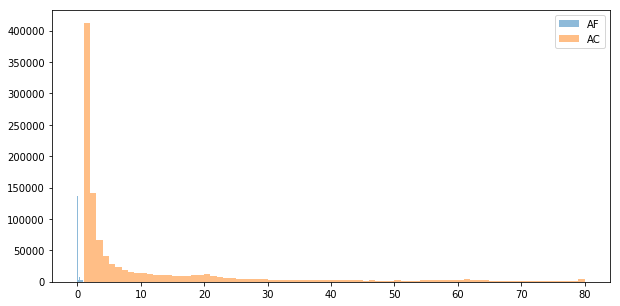

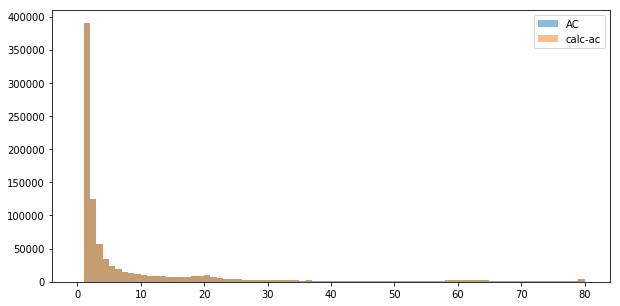

In [22]:
graph.figure(figsize=(10,5))
graph.hist(df['AF'], bins=80, label='AF', alpha=0.5)
graph.hist(df['AC'], bins=80, label='AC', alpha=0.5)
graph.legend()
graph.show()

graph.figure(figsize=(10,5))
graph.hist(max_an['AC'], bins=80, label='AC', alpha=0.5)
graph.hist([max_an['AF'] * 80], bins=80, label='calc-ac', alpha=0.5)
graph.legend()
graph.show()

In [12]:
list_col = [max_an['quality'], max_an['AC'], max_an['AF'], max_an['DP'], max_an['FS'], max_an['SOR']]
col_name = ['Quality', 'AC', 'AF', 'DP', 'FS', 'SOR']

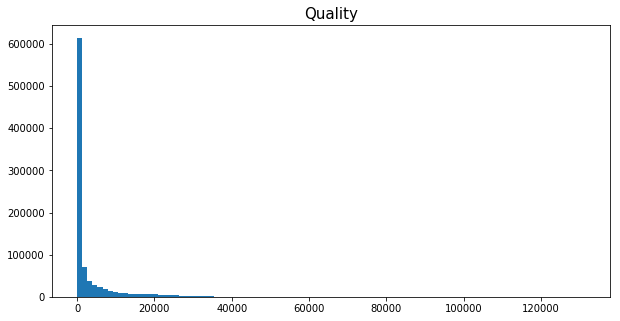

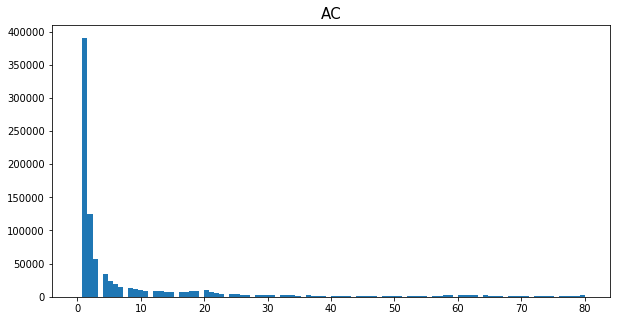

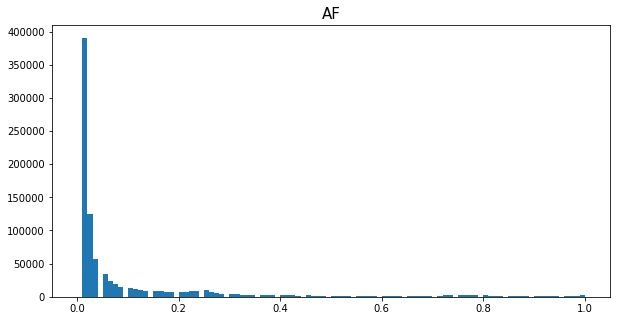

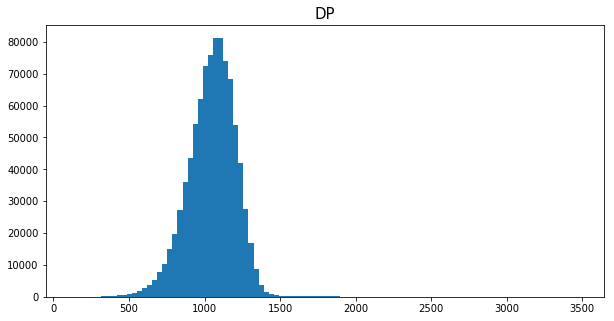

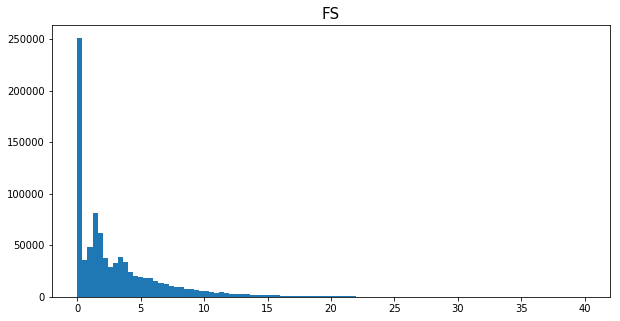

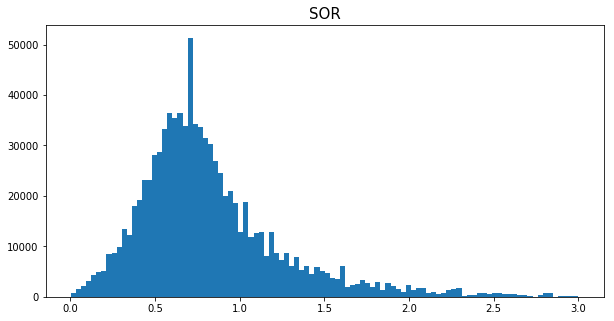

In [14]:
# Histograms
for col, name in zip(list_col, col_name):
    graph.figure(figsize=(10,5))
    graph.title(name, fontsize=15)
    graph.hist(col, bins=100)
    graph.show()

In [9]:
out_depth = max_an[~max_an['DP'].between(500, 1500, inclusive = True)]
out_quality = max_an[~max_an['quality'].between(50, 20000, inclusive = False)]

In [10]:
print(f'Outside depth =', len(out_depth), "SNPs")
print(f'Outside quality =', len(out_quality), "SNPs")

Outside depth = 4550 SNPs
Outside quality = 41402 SNPs


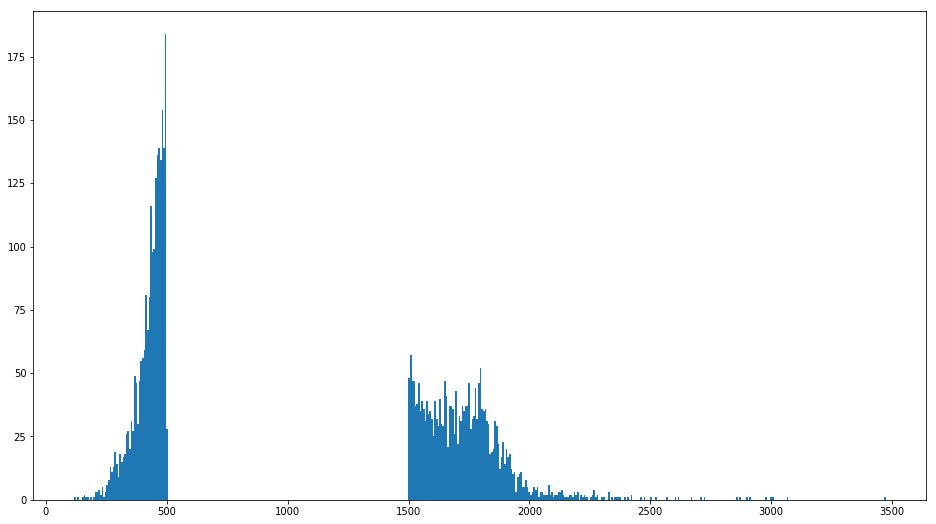

In [17]:
graph.figure(figsize=(16,9))
graph.hist(out_depth['DP'], bins=500)
graph.show()

In [ ]:
graph.figure(figsize=(16,9))
graph.hist(max_an['AF'])
graph.xticks(0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
graph.show()

graph.figure(figsize=(16,9))
graph.hist(max_an['AC'])
graph.show()

In [ ]:
graph.figure(figsize=(10,5))
graph.hist(df['AN'], bins=80)
graph.show()

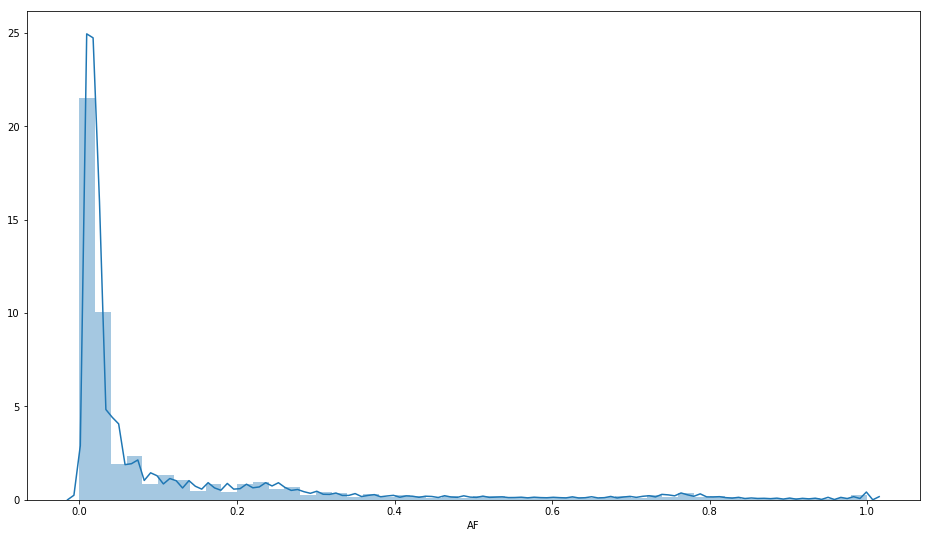

In [24]:
graph.figure(figsize=(16,9))
sns.distplot(max_an['AF'])
graph.show()

## Remnants

data = df[df.columns[0:8]]
data.columns = ['scaffold', 'pos', 'ID', 'ref_allele', 'minor_allele', 'quality', 'filter', 'info']

data['pre-ac'] = data['info'].apply(lambda x: x.split(';')[0])
data['ac-multiple'] = data['pre-ac'].apply(lambda x: x.split('=')[1])
data['af-int'] = data['ac-multiple'].apply(lambda x: x.split(',')[0])

data[['scaffold','pos', 'quality', 'af', 'an', 'af-int']] = (
    data[['scaffold','pos', 'quality', 'af', 'an', 'af-int']].apply(pd.to_numeric)
)

data['chrom'] = data['scaffold'].astype(int)

num_chrom = data['chrom'].unique()

for chromosome in num_chrom:
    data_chrom = data.loc[data['chrom'] == chromosome] 
    graph.figure(figsize=(10,6))
    graph.hist([data_chrom['af']], bins=25)
    graph.title(chromosome, fontsize=20)
    graph.xlabel('af', fontsize=10)
    graph.xlim(0,1)
    graph.ylabel('# sites', fontsize=10)
    graph.show()